<a href="https://colab.research.google.com/github/MaVee06/MaVee06/blob/main/Shuttle__graph_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

Locations ( Nodes)

In [2]:
locations = ["Admin", "Engineering", "ScienceLabs", "Library", "ICT",
             "ResA", "ResB", "Cafeteria", "Sports", "MainEntrance"]


Shuttle Routes (Edges)

Admin Building → Library

Library → ICT Department

ICT Department → Engineering Block

Engineering Block → Science Labs

Science Labs → Cafeteria

Cafeteria → Residence A

Residence A → Residence B

Residence B → Main Entrance

Main Entrance → Admin Building (loop back)

Library → Sports Complex (event-based)

In [3]:
edges = [
    ("Admin", "Library"),
    ("Library", "ICT"),
    ("ICT", "Engineering"),
    ("Engineering", "ScienceLabs"),
    ("ScienceLabs", "Cafeteria"),
    ("Cafeteria", "ResA"),
    ("ResA", "ResB"),
    ("ResB", "MainEntrance"),
    ("MainEntrance", "Admin"),
    ("Library", "Sports")
]

**Directed Graph**

In [4]:
G = nx.DiGraph()
G.add_nodes_from(locations)
G.add_edges_from(edges)

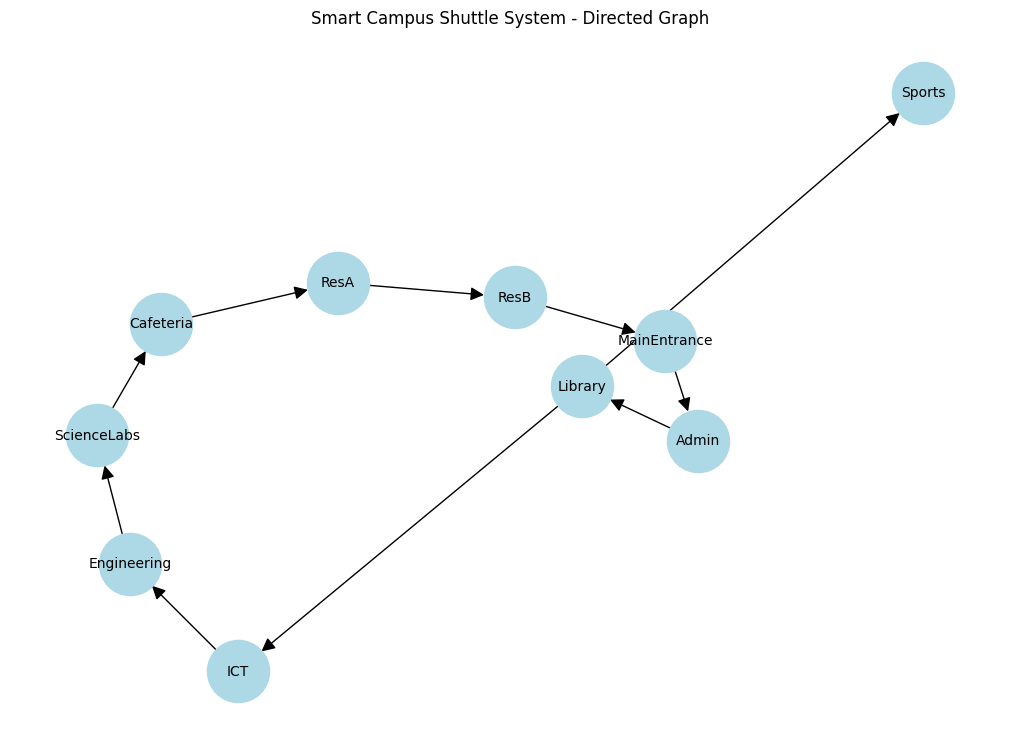

In [5]:
plt.figure(figsize=(10, 7))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000,
        font_size=10, arrows=True, arrowsize=20)
plt.title("Smart Campus Shuttle System - Directed Graph")
plt.show()

**Creating Adjacency Matrix**

In [6]:
adj_matrix = pd.DataFrame(0, index=locations, columns=locations)


Fill matrix where edges exist

In [7]:
for src, dest in edges:
    adj_matrix.loc[src, dest] = 1

In [8]:
print("\n📊 Adjacency Matrix:")
print(adj_matrix)


📊 Adjacency Matrix:
              Admin  Engineering  ScienceLabs  Library  ICT  ResA  ResB  \
Admin             0            0            0        1    0     0     0   
Engineering       0            0            1        0    0     0     0   
ScienceLabs       0            0            0        0    0     0     0   
Library           0            0            0        0    1     0     0   
ICT               0            1            0        0    0     0     0   
ResA              0            0            0        0    0     0     1   
ResB              0            0            0        0    0     0     0   
Cafeteria         0            0            0        0    0     1     0   
Sports            0            0            0        0    0     0     0   
MainEntrance      1            0            0        0    0     0     0   

              Cafeteria  Sports  MainEntrance  
Admin                 0       0             0  
Engineering           0       0             0  
ScienceLa

**Adjacency List (Hash Map)**

In [9]:
adj_list = {location: [] for location in locations}
for src, dest in edges:
    adj_list[src].append(dest)

In [10]:
print("\n📁 Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"{node}: {neighbors}")


📁 Adjacency List:
Admin: ['Library']
Engineering: ['ScienceLabs']
ScienceLabs: ['Cafeteria']
Library: ['ICT', 'Sports']
ICT: ['Engineering']
ResA: ['ResB']
ResB: ['MainEntrance']
Cafeteria: ['ResA']
Sports: []
MainEntrance: ['Admin']
